In [0]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Load the dataset
df = pd.read_csv('/content/drive/My Drive/机器学习/lab2/machine.data')

#Print the first 5 rows of the dataframe.
df.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
#Let's observe the shape of the dataframe.
df.shape

(209, 10)

In [0]:
#Let's create numpy arrays for features and target
X = df.drop('PRP',axis=1).drop('ERP',axis=1).drop('vendor name',axis=1).drop('Model Name',axis=1).values
y = df['PRP'].values

In [0]:
#importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [0]:
#import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_score =np.empty(len(neighbors))
test_score = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    train_predictions = knn.predict(X_train)
    train_score[i] = r2_score(train_predictions,y_train)

    test_predictions = knn.predict(X_test)
    test_score[i] = r2_score(test_predictions,y_test)

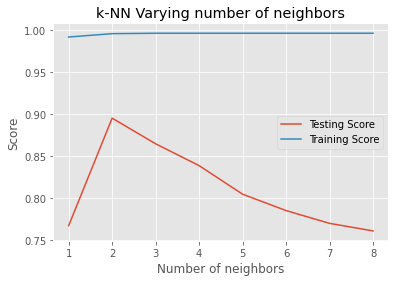

In [23]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_score, label='Testing Score')
plt.plot(neighbors, train_score, label='Training Score')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.show()

In [28]:
#Setup a knn classifier with k neighbors 用k个邻居设置一个knn分类器
knn = KNeighborsRegressor(n_neighbors=2)

#Fit the model
knn.fit(X_train,y_train)

print("score:",knn.score(X_test,y_test))
test_prediction = knn.predict(X_test)
print("r2_score:",r2_score(test_prediction,y_test))

score: 0.9459007622636719
r2_score: 0.9277155887668702
